## Import

In [30]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [31]:
db_path = '../data/beer.db'

In [32]:
query = "SELECT * FROM user_extract"

In [33]:
conn = sqlite3.connect(db_path)
query = 'SELECT * FROM user_extract'
df = pd.read_sql(query,conn)

In [34]:
len(df)

107184

In [35]:
# remove duplicates

df = df[~df.duplicated()]

In [36]:
x = df[['username', 'beer_name', 'beer_description', 'brewery', 'ABV', 'IBU', 'global_rating', 'total']]
y = df['user_rating']

In [37]:
x.head()

,username,beer_name,beer_description,brewery,ABV,IBU,global_rating,total
0,tnt,Society & Solitude #7,IPA - Imperial / Double,Hill Farmstead Brewery,8.0,None,4.38,1
1,tnt,Riwaka Single Hop Pale Ale,Pale Ale - American,Hill Farmstead Brewery,5.2,None,4.14,1
2,tnt,"Walk, Don't Run",Blonde Ale,Suarez Family Brewery,3.7,None,4.10,1
3,tnt,Czech Two,Pilsner - Czech,Gravely Brewing Co,4.1,39,3.81,1
4,tnt,Spirit of Revolt,IPA - Imperial / Double,Revolution Brewing Company,8.2,52,3.82,1


In [38]:
y.head()

0    4.25
1    5.00
2    4.50
3    4.25
4    4.00
Name: user_rating, dtype: float64

## Preprocessing

### Dummy Variables

Descriptions

In [39]:
description_dummies = pd.get_dummies(x['beer_description'], drop_first=True, prefix='beertype')

In [40]:
x = pd.merge(x, description_dummies, left_index=True, right_index=True)
x = x.drop(['beer_description'], axis=1)
x.head()

,username,beer_name,brewery,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,...,beertype_Strong Ale - Other,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl
0,tnt,Society & Solitude #7,Hill Farmstead Brewery,8.0,None,4.38,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tnt,Riwaka Single Hop Pale Ale,Hill Farmstead Brewery,5.2,None,4.14,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tnt,"Walk, Don't Run",Suarez Family Brewery,3.7,None,4.10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tnt,Czech Two,Gravely Brewing Co,4.1,39,3.81,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tnt,Spirit of Revolt,Revolution Brewing Company,8.2,52,3.82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Breweries

In [41]:
brewery_dummies = pd.get_dummies(x['brewery'], drop_first=True, prefix='brewery')

In [42]:
x = pd.merge(x, brewery_dummies, left_index=True, right_index=True)
x = x.drop(['brewery'], axis=1)

In [43]:
x.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Токсовская Сидрерия (On The Bones),brewery_Тощий Заяц,brewery_Уманьпиво,brewery_Ферментстейшн,brewery_Фонтан / Кваспром,brewery_Хадыженский Пивзавод,brewery_Хмельной Патрик,brewery_Частная пивоварня Joker,brewery_Чисто пивоварня,brewery_Южный пивовар
0,tnt,Society & Solitude #7,8.0,None,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tnt,Riwaka Single Hop Pale Ale,5.2,None,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tnt,"Walk, Don't Run",3.7,None,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tnt,Czech Two,4.1,39,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tnt,Spirit of Revolt,8.2,52,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Outlier Analysis using IQR

num of outliers = 3421
% of outliers = 3.334372989726895


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D233B278>]],
      dtype=object)

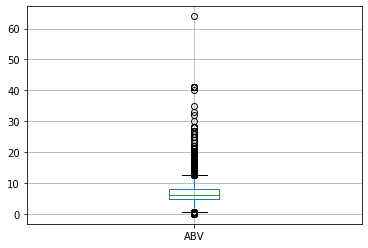

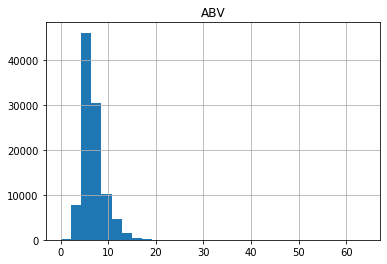

In [44]:
feature = 'ABV'

q1 = x[feature].quantile(.25)
q3 = x[feature].quantile(.75)
iqr = q3 - q1
non_outlier_mask = (x[feature] >= q1 - 1.5*iqr) & (x[feature] <= q3 + 1.5*iqr)

outliers = x[~non_outlier_mask]

print("num of outliers =", len(outliers))
print("% of outliers =", 100*len(outliers)/len(x))

x.boxplot(column=[feature])
x.hist(column=feature, bins=30)

num of outliers = 3648
% of outliers = 3.555624865981793


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D37E87B8>]],
      dtype=object)

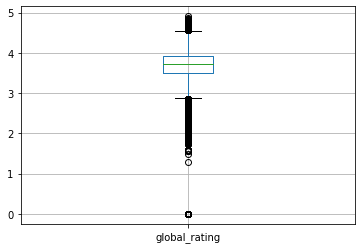

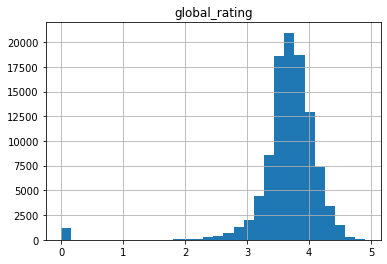

In [45]:
feature = 'global_rating'

q1 = x[feature].quantile(.25)
q3 = x[feature].quantile(.75)
iqr = q3 - q1
non_outlier_mask = (x[feature] >= q1 - 1.5*iqr) & (x[feature] <= q3 + 1.5*iqr)

outliers = x[~non_outlier_mask]

print("num of outliers =", len(outliers))
print("% of outliers =", 100*len(outliers)/len(x))

x.boxplot(column=[feature])
x.hist(column=feature, bins=30)

num of outliers = 11266
% of outliers = 10.980720871751886


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D4E50828>]],
      dtype=object)

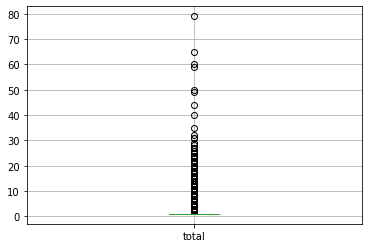

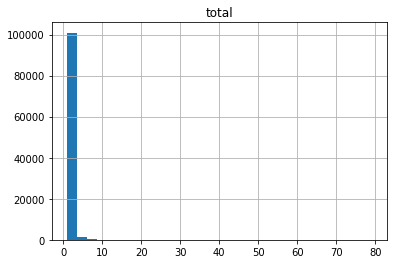

In [46]:
feature = 'total'

q1 = x[feature].quantile(.25)
q3 = x[feature].quantile(.75)
iqr = q3 - q1
non_outlier_mask = (x[feature] >= q1 - 1.5*iqr) & (x[feature] <= q3 + 1.5*iqr)

outliers = x[~non_outlier_mask]

print("num of outliers =", len(outliers))
print("% of outliers =", 100*len(outliers)/len(x))

x.boxplot(column=[feature])
x.hist(column=feature, bins=30)

The factor measuring a user's total number of checkins for a specific beer seems to have a decent amount of outliers, however this is data I want to keep moving forward as it may be a good indication for user-user recommendations.

In [47]:
## IBU has many NAs and has to be converted to view outliers

x['IBU'].fillna(value=np.nan, inplace=True)
x['IBU'].replace('None', np.nan, inplace=True)

x['IBU'].fillna(value=-1, inplace=True)

In [48]:
x['IBU'] = x['IBU'].astype('float')

In [49]:
print("number of data points with missing IBU =", len(x[x['IBU'] == -1]))
print("percentage of data points with missing IBU =", 100*len(x[x['IBU'] == -1])/len(x))

number of data points with missing IBU = 47035
percentage of data points with missing IBU = 45.843973566736196


subset data length =  55563
num of outliers = 557
% of outliers = 0.5428955730131192


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D49B7978>]],
      dtype=object)

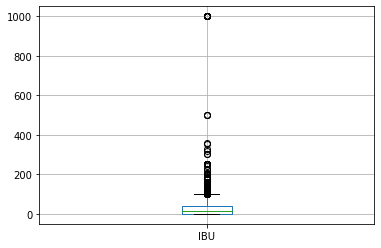

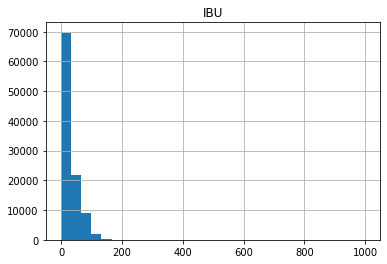

In [50]:
feature = 'IBU'

x_noIBUna = x[x['IBU'] != -1]

print('subset data length = ', len(x_noIBUna))

q1 = x_noIBUna[feature].quantile(.25)
q3 = x_noIBUna[feature].quantile(.75)
iqr = q3 - q1
non_outlier_mask = (x_noIBUna[feature] >= q1 - 1.5*iqr) & (x_noIBUna[feature] <= q3 + 1.5*iqr)

outliers = x_noIBUna[~non_outlier_mask]

print("num of outliers =", len(outliers))
print("% of outliers =", 100*len(outliers)/len(x))

x.boxplot(column=[feature])
x.hist(column=feature, bins=30)

All features except 'total' seem to have an acceptable amount of outliers (< 5%), which is expected for such a large dataset.

### Imputation - Missing Values and Types

In [51]:
x.isna().sum().head(5)

username           0
beer_name          0
ABV              923
IBU                0
global_rating      0
dtype: int64

In [52]:
# ABV
x['ABV'] = x['ABV'].fillna(x['ABV'].mean())

In [53]:
# IBU
ibu_mean = x[x['IBU'] != -1]['IBU'].mean()
x['IBU'].replace(-1, ibu_mean, inplace=True)

In [54]:
x['IBU'] = x['IBU'].astype('float')
x.dtypes

username                                              object
beer_name                                             object
ABV                                                  float64
IBU                                                  float64
global_rating                                        float64
total                                                  int64
beertype_Adambier                                      uint8
beertype_Altbier                                       uint8
beertype_American Wild Ale                             uint8
beertype_Australian Sparkling Ale                      uint8
beertype_Barleywine - American                         uint8
beertype_Barleywine - English                          uint8
beertype_Barleywine - Other                            uint8
beertype_Belgian Blonde                                uint8
beertype_Belgian Dubbel                                uint8
beertype_Belgian Quadrupel                             uint8
beertype_Belgian Strong 

In [55]:
x.isna().sum().head(5)

username         0
beer_name        0
ABV              0
IBU              0
global_rating    0
dtype: int64

## Write to CSV - too many columns for DB

In [56]:
new_df = pd.merge(x,y, left_index=True, right_index=True)

In [57]:
new_df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Тощий Заяц,brewery_Уманьпиво,brewery_Ферментстейшн,brewery_Фонтан / Кваспром,brewery_Хадыженский Пивзавод,brewery_Хмельной Патрик,brewery_Частная пивоварня Joker,brewery_Чисто пивоварня,brewery_Южный пивовар,user_rating
0,tnt,Society & Solitude #7,8.0,44.159369,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,44.159369,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,44.159369,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


In [58]:
new_df.to_csv('../data/prepped_data_whole.csv', index=False, chunksize=1000)

KeyboardInterrupt: 